In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# Завантаження даних
df = pd.read_csv('possum.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
# ПОПЕРЕДНЯ ОБРОБКА ДАНИХ:

# Кодування категоріальних змінних
# Перетворюємо текстові значення на числа
df['sex'] = df['sex'].map({'m': 1, 'f': 0})
df['Pop'] = df['Pop'].map({'Vic': 1, 'other': 0})

In [8]:
# Робота з пропущеними даними
print(f"Пропуски до очищення:\n{df.isnull().sum()}")
df.dropna(inplace=True) # видаляємо рядки з пустими значеннями
print(f"Пропуски після очищення:\n{df.isnull().sum()}")

Пропуски до очищення:
case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64
Пропуски після очищення:
case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [9]:
# Перевірка статистики
df.describe()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,0.425743,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,0.496921,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,0.000000,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,0.000000,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,1.000000,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


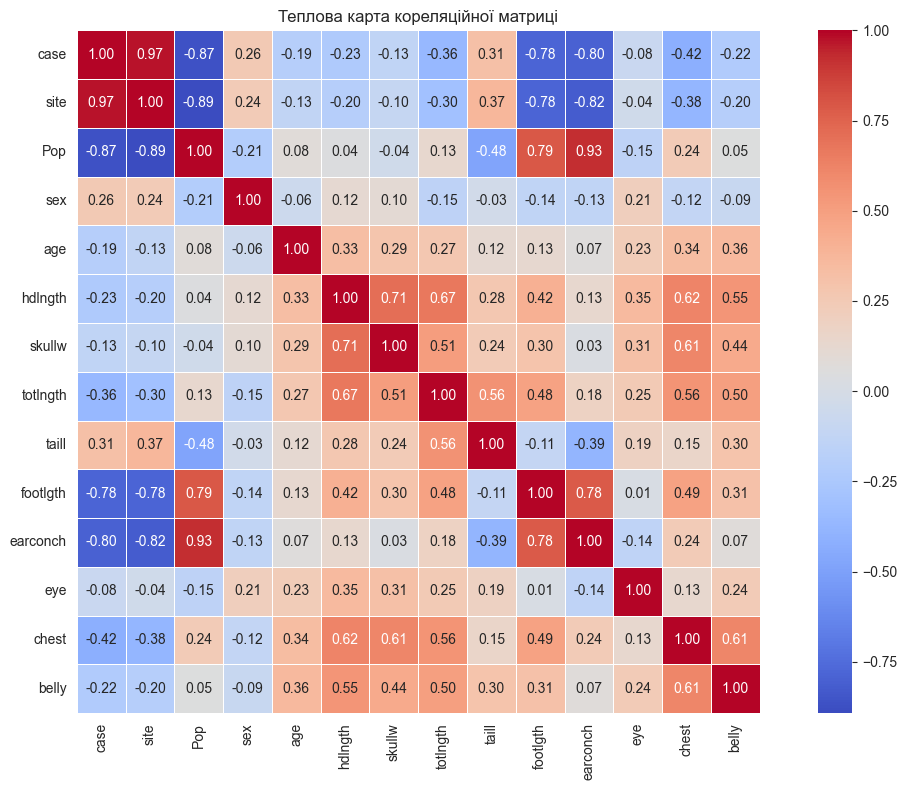

In [10]:
# Кореляційна матриця
plt.figure(figsize=(12, 8))
matr_corr = df.corr()
sns.heatmap(matr_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Теплова карта кореляційної матриці")
plt.tight_layout()
plt.show()

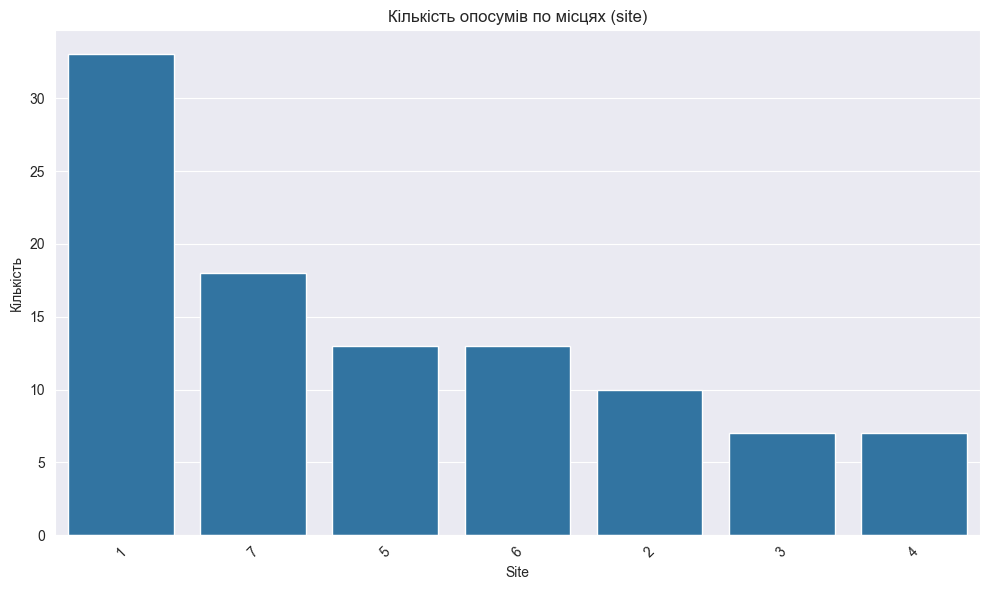

In [11]:
# Розподіл опосумів по місцях
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='site', order=df['site'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Кількість опосумів по місцях (site)')
plt.xlabel('Site')
plt.ylabel('Кількість')
plt.tight_layout()
plt.show()

In [12]:
# Вибір та масштабування ознак
# вибираємо тільки фізичні характеристики для кластеризації
features = df[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [13]:
# стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

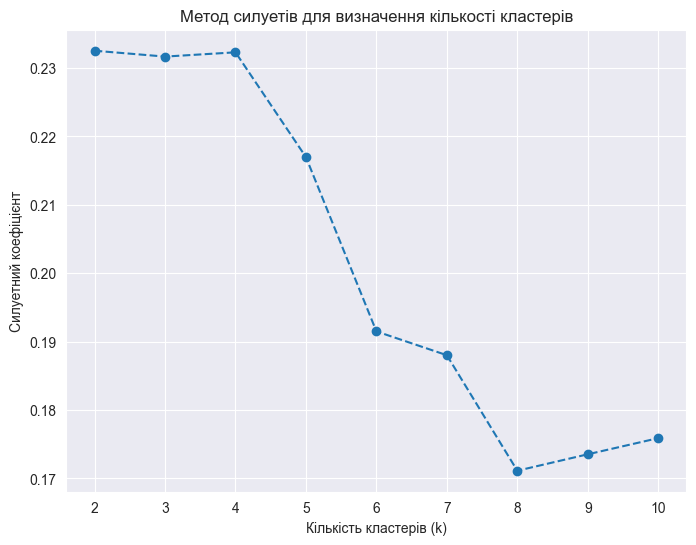

In [14]:
# 7. Визначення оптимальної кількості кластерів (Метод силуетів)
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Графік силуетів
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Силуетний коефіцієнт')
plt.grid(True)
plt.show()

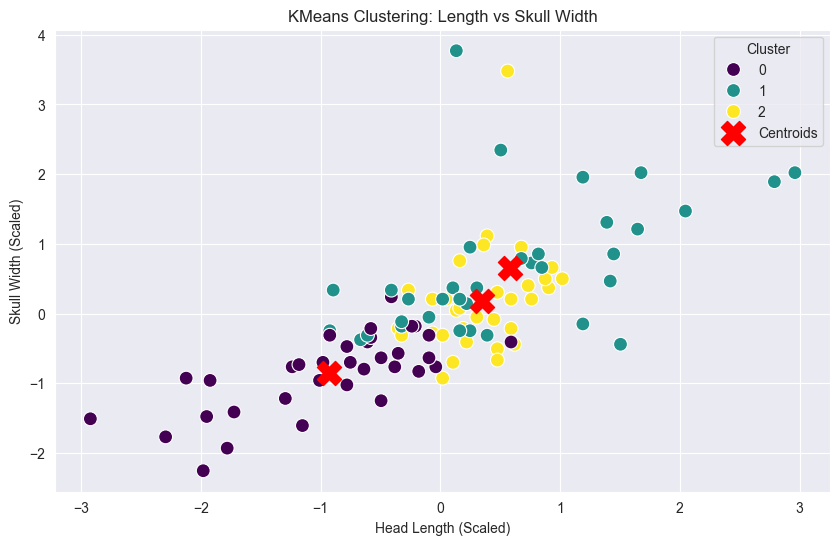

In [15]:
# Фінальна кластеризація (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# додаємо мітки кластерів назад у датафрейм
df['Cluster'] = clusters

# Візуалізація результатів кластеризації
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full', s=100)

# додавання центроїдів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('KMeans Clustering: Length vs Skull Width')
plt.xlabel('Head Length (Scaled)')
plt.ylabel('Skull Width (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Висновки: <br>
У ході роботи було виконано попередню обробку даних про популяцію опосумів, включаючи кодування категоріальних змінних та очищення від пропусків. За допомогою кореляційного аналізу та візуалізації було досліджено зв'язки між різними фізичними параметрами тварин. На фінальному етапі було застосовано алгоритми KMeans до стандартизованих даних, що дозволило розділити вибірку на три чіткі кластери на основі морфологічних ознак.